# Import Dependencies

In [1]:
#importar las dependencias
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar la ruta de archivo PIB
gdp_data_to_load = "../Resources/GDP.csv"

# Cargar la ruta de catalogo paises
onu_data_to_load = "../Resources/ONU.csv"

# Establece el archivo de Salida
file_name = "../Resources/PIB.csv"

# Read information

In [2]:
# Lee los archivos y almacenarlos en un dataframe
df_gdp_data = pd.read_csv(gdp_data_to_load)
df_onu_data = pd.read_csv(onu_data_to_load)

# Clean Data

In [3]:
# Los datos fueron obtenidos desde el banco mundial:
# http://datatopics.worldbank.org/world-development-indicators/themes/economy.html

# Se renombran las columnas para generar una subnet
df_gdp_data.rename(columns={'Country Name':'Country'}, inplace=True)

In [4]:
#Se obtienen las diferencias entre los diferentes paises
diferencia = set(pd.unique(df_onu_data["Country"]).tolist()) - set(pd.unique(df_gdp_data["Country"]).tolist()) 

In [6]:
#Se limpia la informacion de acuerdo a las diferencias
# Se limpia el dataframe de la ONU

df_onu_data['Country'] = df_onu_data['Country'].str.lower() 
df_onu_data['Country'] = df_onu_data['Country'].str.replace(r"\s+\(.*\)","")
df_onu_data['Country'] = df_onu_data['Country'].str.replace(r"\s+\[.*\]","")
df_onu_data['Country'] = df_onu_data['Country'].str.replace(r"\[.*\]","")

# Se limpia el dataframe de el PIB
df_gdp_data['Country'] = df_gdp_data['Country'].str.lower() 
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("bahamas, the","bahamas")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("cabo verde","cape verde")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("congo, rep.","congo")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("cote d'ivoire","côte d’ivoire")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("congo, dem. rep.","democratic republic of the congo")

df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("korea, rep.","republic of korea")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("korea, dem. people’s rep.","democratic people’s republic of korea")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("egypt, arab rep.","egypt")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("gambia, the","gambia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("iran, islamic rep.","iran")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("lao pdr","lao people’s democratic republic")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("macedonia, fyr","the former yugoslav republic of macedonia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("micronesia, fed. sts.","micronesia")

df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("moldova","republic of moldova")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("syrian arab republic","syria")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("slovak republic","slovakia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("st. vincent and the grenadines","saint vincent and the grenadines")

df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("st. lucia","saint lucia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("st. kitts and nevis","saint kitts and nevis")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("tanzania","united of republic of tanzania")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("timor-leste","timor leste")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("vietnam","viet nam")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("venezuela, rb","venezuela")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("yemen, rep.","yemen")


In [7]:
#Se vuelve a validar las diferencias en los paises
diferencia = set(pd.unique(df_onu_data["Country"]).tolist()) - set(pd.unique(df_gdp_data["Country"]).tolist()) 


# Shift Data

In [8]:
# Se quitan las ultimas columnas para que coincidan con los años
df_gdp_data.drop(df_gdp_data.columns[[-1, -2, -3, -4, -5, -6]], axis=1, inplace=True)
df_gdp_data.set_index("Country")

# Se agrupa el data frame del PIB para tener la misma estructura que el de la ONU
df_pib = pd.wide_to_long(df_gdp_data, ["PIB"], i="Country", j="Year")
df_pib.head(5)


,,Indicator Name,Indicator Code,Country Code,PIB
Country,Year,,,,
aruba,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ABW,NaN
afghanistan,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AFG,NaN
angola,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AGO,NaN
albania,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ALB,NaN
andorra,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AND,NaN


In [9]:
# Se resetea el indice del nuevo dataframe
df_pib = df_pib.reset_index()

In [10]:
# Se exporta la información del PIB
df_pib.to_csv(file_name, encoding='utf-8', index=False)
df_pib.head(5)

,Country,Year,Indicator Name,Indicator Code,Country Code,PIB
0,aruba,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ABW,NaN
1,afghanistan,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AFG,NaN
2,angola,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AGO,NaN
3,albania,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ALB,NaN
4,andorra,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AND,NaN


In [11]:
# Top 5 de paises con mejor PIB
year = input ("Please select year you'd like to analyze PIB: ").lower()
df_top_country_pib = df_pib[df_pib['Year'] == int(year)]
df_top_country_pib = df_top_country_pib.sort_values(by=['PIB'], ascending=False)
df_top_country_pib.head(5)

Please select year you'd like to analyze PIB: 2010


,Country,Year,Indicator Name,Indicator Code,Country Code,PIB
13344,"macao sar, china",2010,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,MAC,25.264228
13463,zimbabwe,2010,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ZWE,19.675323
13398,qatar,2010,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,QAT,19.592332
13406,singapore,2010,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,SGP,15.240377
13201,afghanistan,2010,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AFG,14.362441


# Showing information about PIB 

Please type the country you would like to analyze: mexico


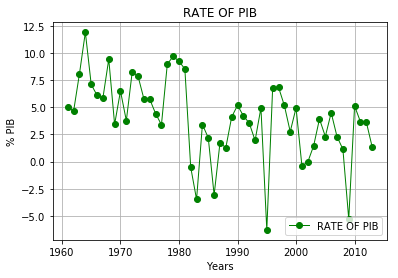

In [12]:
country = input ("Please type the country you would like to analyze: ").lower()
country_plt = df_pib[df_pib['Country'] == country]
plt.plot(country_plt['Year'], country_plt['PIB'], marker ='o', color='g', label="RATE OF PIB",
         linestyle='solid', linewidth=1, markersize=6 )
plt.legend(loc="lower right")
plt.title("RATE OF PIB")
plt.xlabel("Years")
plt.ylabel("% PIB")
plt.grid(True)
plt.show()

# PIB VS POP

In [13]:
# Cargar la ruta de archivo PIB
poblation_data_to_load = "../Resources/POP.csv"
# Lee los archivos y almacenarlos en un dataframe
df_pop = pd.read_csv(poblation_data_to_load)

In [14]:
# Realizar el marge entre los dos dataframes
df_pop_country = pd.merge(df_pib, df_pop, on=['Country','Year'])
df_pop_country.head(5)


,Country,Year,Indicator Name_x,Indicator Code_x,Country Code_x,PIB,Indicator Code_y,Indicator Name_y,Country Code_y,POP
0,aruba,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ABW,NaN,SP.POP.GROW,Population growth (annual %),ABW,3.148037
1,afghanistan,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AFG,NaN,SP.POP.GROW,Population growth (annual %),AFG,1.816077
2,angola,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AGO,NaN,SP.POP.GROW,Population growth (annual %),AGO,1.903517
3,albania,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,ALB,NaN,SP.POP.GROW,Population growth (annual %),ALB,3.015423
4,andorra,1960,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,AND,NaN,SP.POP.GROW,Population growth (annual %),AND,7.050663


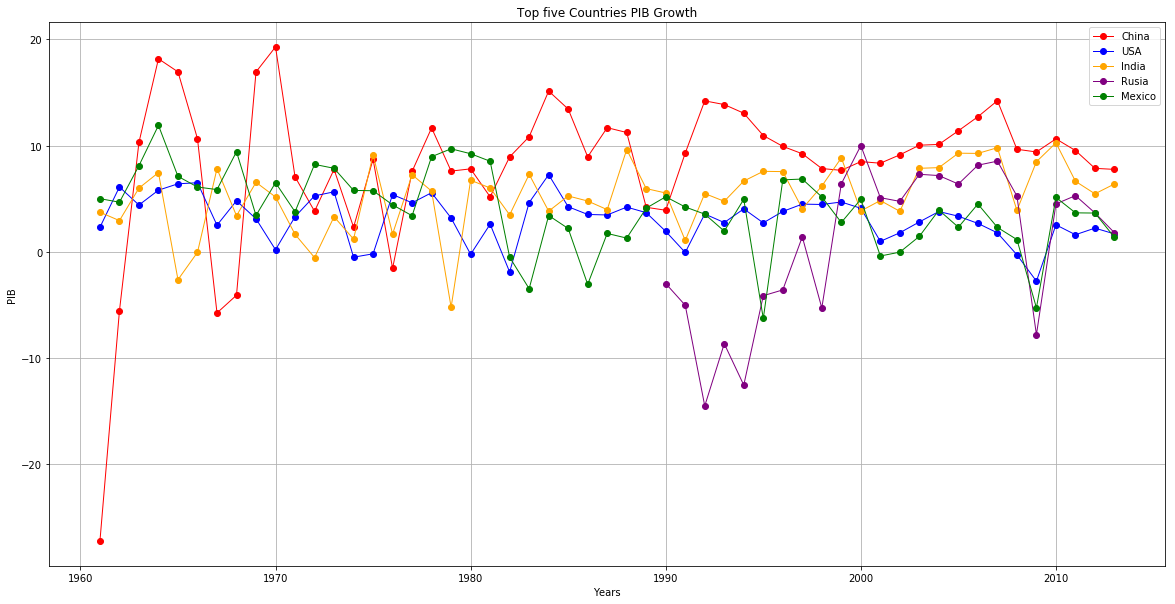

In [20]:
top_countries = ['china', 'united states', 'india', 'russian federation', 'mexico']

china = df_pop_country[df_pop_country['Country'] == 'china']
us = df_pop_country[df_pop_country['Country'] == 'united states']
india = df_pop_country[df_pop_country['Country'] == 'india']
rusia = df_pop_country[df_pop_country['Country'] == 'russian federation']
mexico = df_pop_country[df_pop_country['Country'] == 'mexico']

plt.figure(figsize=(20,10))

plt.plot(china['Year'], china['PIB'], marker ='o', color='red', label="China",
        linestyle='solid', linewidth=1, markersize=6
       )

plt.plot(us['Year'], us['PIB'], marker ='o', color='blue', label="USA",
        linestyle='solid', linewidth=1, markersize=6
       )

plt.plot(india['Year'], india['PIB'], marker ='o', color='orange', label="India",
        linestyle='solid', linewidth=1, markersize=6
       )

plt.plot(rusia['Year'], rusia['PIB'], marker ='o', color='purple', label="Rusia",
        linestyle='solid', linewidth=1, markersize=6
       )

plt.plot(mexico['Year'], mexico['PIB'], marker ='o', color='green', label="Mexico",
        linestyle='solid', linewidth=1, markersize=6
       )

plt.legend(loc="best")

plt.title("Top five Countries PIB Growth")
plt.xlabel("Years")
plt.ylabel("PIB")
plt.grid(True)

plt.savefig("../Resources/Top5PIB.png")
plt.savefig("../../Images/Top5PIB.png")
